# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import os
os.getcwd()

'/home/workspace/dog_project'

In [3]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


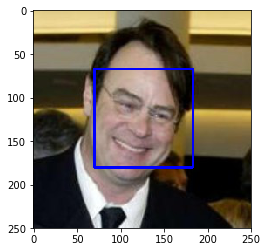

In [32]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [30]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

Using haarcascades face detector:

Detected human faces in the first 100 human images: 98%

Detected faces in the first 100 dogs images: 17%


In [33]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

detected_faces_in_humans = 0
detected_faces_in_dogs = 0

for image in range(100):
    if face_detector(human_files_short[image]):
        detected_faces_in_humans += 1
    if face_detector(dog_files_short[image]):
        detected_faces_in_dogs +=1
        
print (f"Detected human faces: {detected_faces_in_humans}%")
print (f"Detected faces in dogs: {detected_faces_in_dogs}%")



Detected human faces: 98%
Detected faces in dogs: 17%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.


#Approach II: OPENCV LBP CASCADE CLASSIFIER
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade/lbpcascade_frontalface_improved.xml')  
    
def lbp_face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = lbp_face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [14]:
detected_faces_in_humans = 0
detected_faces_in_dogs = 0

for image in range(100):
    if lbp_face_detector(human_files_short[image]):
        detected_faces_in_humans += 1
    if lbp_face_detector(dog_files_short[image]):
        detected_faces_in_dogs +=1
        
print (f"Detected human faces (LBP): {detected_faces_in_humans}%")
print (f"Detected faces in dogs(LBP): {detected_faces_in_dogs}%")

error: /tmp/build/80754af9/opencv_1512491964794/work/modules/objdetect/src/cascadedetect.cpp:1698: error: (-215) !empty() in function detectMultiScale


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [34]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:09<00:00, 60956366.40it/s]


In [8]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [35]:
from PIL import Image
import torchvision.transforms as transforms

def image_to_tensor(img_path):
    '''
    As per Pytorch documentations: All pre-trained models expect input images normalized in the same way, 
    i.e. mini-batches of 3-channel RGB images
    of shape (3 x H x W), where H and W are expected to be at least 224. 
    The images have to be loaded in to a range of [0, 1] and 
    then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. 
    You can use the following transform to normalize:
    '''
    img = Image.open(img_path).convert('RGB')
    transformations = transforms.Compose([transforms.Resize(size=224),
                                          transforms.CenterCrop((224,224)),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    image_tensor = transformations(img)[:3,:,:].unsqueeze(0)
    return image_tensor


# helper function for un-normalizing an image  - from STYLE TRANSFER exercise
# and converting it from a Tensor image to a NumPy image for display
def im_convert(tensor):
    """ Display a tensor as an image. """
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

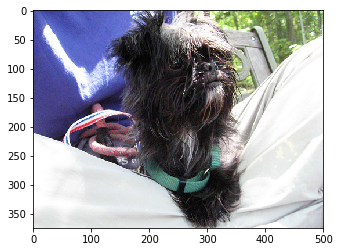

In [36]:
dog_image = Image.open('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00005.jpg')
plt.imshow(dog_image)
plt.show()

tensor([[[[-0.6109, -0.6281, -0.6281,  ..., -0.1999, -0.0972, -0.0801],
          [-0.6965, -0.5596, -0.6281,  ..., -0.1828,  0.0056, -0.0972],
          [-0.7479, -0.6281, -0.7137,  ..., -0.2342, -0.2171, -0.1828],
          ...,
          [ 1.8379,  1.8379,  1.8379,  ...,  1.9749,  1.9578,  1.9064],
          [ 1.8893,  1.8893,  1.8722,  ...,  2.1462,  2.0605,  1.9920],
          [ 1.9064,  1.9064,  1.8893,  ...,  2.2318,  2.2147,  2.1633]],

         [[-0.2850, -0.3375, -0.2850,  ...,  0.1527,  0.2227,  0.1001],
          [-0.3725, -0.3375, -0.3025,  ...,  0.1527,  0.1702,  0.1001],
          [-0.3200, -0.2850, -0.3375,  ...,  0.1176,  0.0826,  0.1001],
          ...,
          [ 2.0084,  2.0259,  2.0434,  ...,  2.2360,  2.2010,  2.1835],
          [ 2.0784,  2.0784,  2.0784,  ...,  2.3410,  2.2710,  2.2185],
          [ 2.1134,  2.1134,  2.0959,  ...,  2.4111,  2.3936,  2.3410]],

         [[ 1.5594,  1.5071,  1.5942,  ..., -0.2358,  0.0605, -0.0267],
          [ 1.5420,  1.4722,  

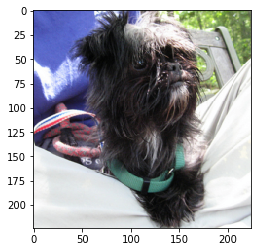

In [37]:
test_tensor = image_to_tensor('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00005.jpg')
print(test_tensor)
print(test_tensor.shape)
plt.imshow(im_convert(test_tensor))

In [38]:

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image_tensor = image_to_tensor(img_path)
   
    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()

    # get sample outputs
    output = VGG16(image_tensor)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
 
    return int(pred)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [39]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    prediction = VGG16_predict(img_path)
#     print(prediction)
    return ((prediction >= 151) & (prediction <=268))

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
    
    Percentage of the images in human_files_short that have a detected dog: 1%
    
    Percentage of the images in dog_files_short that have a detected dog: 100%


This human (88) looks like a dog


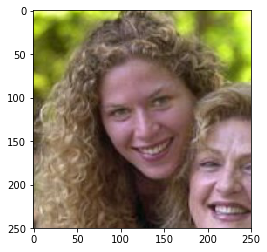

Percentage of the images in human_files_short that have a detected dog: 1%
Percentage of the images in dog_files_short that have a detected dog: 100%


In [14]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

detected_dogs_in_humans = 0
detected_dogs_in_dogs = 0

for image in range(100):
    if dog_detector(human_files_short[image]):
        detected_dogs_in_humans += 1
        print(f"This human ({image}) looks like a dog")
        human_dog_image = Image.open(human_files_short[image])
        plt.imshow(human_dog_image)
        plt.show()
    if dog_detector(dog_files_short[image]):
        detected_dogs_in_dogs +=1
        
print (f"Percentage of the images in human_files_short that have a detected dog: {detected_dogs_in_humans}%")
print (f"Percentage of the images in dog_files_short that have a detected dog: {detected_dogs_in_dogs}%")


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [15]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

# I will working on different architectures to improve the model accuracy 

In [4]:
import os
import random
import requests
import time
import ast
import numpy as np
from glob import glob
import cv2                
from tqdm import tqdm
from PIL import Image, ImageFile 

import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models

import matplotlib.pyplot as plt                        
%matplotlib inline

ImageFile.LOAD_TRUNCATED_IMAGES = True

# check if CUDA is available
use_cuda = torch.cuda.is_available()

## Approach 1 

In [27]:

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# np.array(glob("/data/lfw/*/*"))

batch_size = 20
num_workers = 0

data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

In [28]:
# train_data = datasets.ImageFolder(root=train_dir, transform=data_transforms['train'])
print(train_dir)
print(valid_dir)
print(test_dir)

/data/dog_images/train/
/data/dog_images/valid/
/data/dog_images/test/


In [29]:
# User standarization normal value
standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])

data_transforms = {'train': transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     standard_normalization]),
                   'val': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     standard_normalization]),
                   'test': transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(), 
                                     standard_normalization])
                  }

In [63]:
# Use ImageFolder to Load image_dataset
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['val'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

In [64]:
train_data

Dataset ImageFolder
    Number of datapoints: 6680
    Root Location: /data/dog_images/train/
    Transforms (if any): Compose(
                             RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                             RandomHorizontalFlip(p=0.5)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
I've applied RandomResizedCrop & RandomHorizontalFlip to just train_data. This will do both image augmentations and resizing jobs. Image augmentation will give randomness to the dataset so, it prevents overfitting and I can expect better performance of model when it's predicting toward test_data. On the other hand, I've done Resize of (256) and then, center crop to make 224 X 224. Since valid_data will be used for validation check, I will not do image augmentations. For the test_data, I've applied only image resizing.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [65]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        
        # pool
        self.pool = nn.MaxPool2d(2,2)
        
        # fully connected
        self.fc1 = nn.Linear(7*7*128, 500)
        self.fc2 = nn.Linear(500, num_classes)
        
        # dropout
        self.dropout = nn.Dropout(0.3)

    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        # flatten
        x = x.view(-1, 7*7*128)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.3)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
(conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

activation: relu

(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

activation: relu

(conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

activation: relu

(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

(conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

(dropout): Dropout(p=0.3)

(fc1): Linear(in_features=6272, out_features=500, bias=True)

(dropout): Dropout(p=0.3)

(fc2): Linear(in_features=500, out_features=133, bias=True)

Further details:

First 2 conv layers I've applied kernel_size of 3 with stride 2, this will lead to downsize of input image by 2. after 2 conv layers, maxpooling with stride 2 is placed and this will lead to downsize of input image by 2. The 3rd conv layers is consist of kernel_size of 3 with stride 1, and this will not reduce input image. after final maxpooling with stride 2, the total output image size is downsized by factor of 32 and the depth will be 128. I've applied dropout of 0.3 in order to prevent overfitting. Fully-connected layer is placed and then, 2nd fully-connected layer is intended to produce final output_size which predicts classes of breeds.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [66]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [67]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path,last_validation_loss=None):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    if last_validation_loss is not None:
        valid_loss_min = last_validation_loss
    else:
        valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # initialize weights to zero
            optimizer.zero_grad()
            
            output = model(data)
            
            # calculate loss
            loss = criterion(output, target)
            
            # back prop
            loss.backward()
            
            # grad
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss    
    # return trained model
    return model




In [68]:
# Train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch 1, Batch 1 loss: 4.890738
Epoch 1, Batch 101 loss: 4.885060
Epoch 1, Batch 201 loss: 4.882010
Epoch 1, Batch 301 loss: 4.870348
Epoch: 1 	Training Loss: 4.866890 	Validation Loss: 4.800590
Validation loss decreased (inf --> 4.800590).  Saving model ...
Epoch 2, Batch 1 loss: 4.799147
Epoch 2, Batch 101 loss: 4.805450
Epoch 2, Batch 201 loss: 4.785594
Epoch 2, Batch 301 loss: 4.774478
Epoch: 2 	Training Loss: 4.769247 	Validation Loss: 4.656503
Validation loss decreased (4.800590 --> 4.656503).  Saving model ...
Epoch 3, Batch 1 loss: 4.515317
Epoch 3, Batch 101 loss: 4.666906
Epoch 3, Batch 201 loss: 4.654472
Epoch 3, Batch 301 loss: 4.649026
Epoch: 3 	Training Loss: 4.646795 	Validation Loss: 4.483162
Validation loss decreased (4.656503 --> 4.483162).  Saving model ...
Epoch 4, Batch 1 loss: 4.644751
Epoch 4, Batch 101 loss: 4.570409
Epoch 4, Batch 201 loss: 4.571855
Epoch 4, Batch 301 loss: 4.569745
Epoch: 4 	Training Loss: 4.567685 	Validation Loss: 4.426503
Validation loss de

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [69]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [70]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.060152


Test Accuracy:  8% (71/836)


# Approach 2 

In [30]:
train_dir

'/data/dog_images/train/'

In [5]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets
import torch.nn as nn
import torch.nn.functional as F

In [6]:
import os

transform_train = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
transform_valid_test = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_data = datasets.ImageFolder('/data/dog_images/train/', transform=transform_train)
valid_data = datasets.ImageFolder('/data/dog_images/valid/', transform=transform_valid_test)
test_data = datasets.ImageFolder('/data/dog_images/test/', transform=transform_valid_test)

# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
loaders = {};
loaders['train'] = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders['valid'] = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders['test'] = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

Inspired by the VGG_16 requirement of the input image to be of size 224x224, we decided on resizing the image to size 224. The following transforms are applied to the training images:

1. RandomHorizontalFlip(): Horizontally flip the image randomly with a probability of 0.5.
2. RandomResizedCrop(224): Sample various sized patches of the image whose size is distributed evenly between 8% and 100% of the image area and whose aspect ratio is chosen randomly between 3/4 and 4/3. Finally, resize the patch to 224x224.
3. Resize(256): Resize the image to 256x256.
4. CenterCrop(224): Sample a square patch of size 224x224 from the center of the image
5. Normalize(): Normalize a tensor image with the provided mean and standard deviation.

Data augmentation helps prevent overfitting and helps with better generalization.

### Model Architecture

In [8]:
# Basic VGG-like architecture
# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)   # input: 3x224x224, output: 16x224x224
        self.pool1 = nn.MaxPool2d(2, 2)               # input: 16x224x224, output: 16x112x112
        
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # input: 16x112x112, output: 32x112x112
        self.pool2 = nn.MaxPool2d(2, 2)               # input: 32x112x112, output: 32x56x56
        
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  # input: 32x56x56, output: 64x56x56
        self.pool3 = nn.MaxPool2d(2, 2)               # input: 64x56x56, output: 64x28x28
        
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1) # input: 64x28x28, output: 128x28x28
        self.pool4 = nn.MaxPool2d(2, 2)               # input: 128x28x28, output: 128x14x14
        
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)# input: 128x14x14, output: 256x14x14
        self.pool5 = nn.MaxPool2d(2, 2)               # input: 256x14x14, output: 256x7x7
        
        self.fc1 = nn.Linear(256 * 7 * 7, 500)        # linear layer (256 * 7 * 7 -> 500)
        
        self.fc2 = nn.Linear(500, 133)                # linear layer (500 -> 133)
        self.dropout = nn.Dropout(0.25)    
        
    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = self.pool5(F.relu(self.conv5(x)))
        x = self.dropout(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)    
        
        return x

We took the following steps:

1. I started with a light weight VGG-like architecture called Net() with alternate conv, relu, pool layers with couple of fully connected (FC) layers towards the end. We also added small dropouts in the FC layers for regularization.
2. Set the loss function to cross entropy loss and the optimization function to Adam optimizer.
3. Trained the network for 15 epochs at learning rate of 0.001.
4. Saved the model with lowest validation loss.
5. Evaluated the performance on the test data.

In addition, we tried lots of other options such as:
1. I tried replacing pooling layers with stride 2 convolution in the architecture. We saw the performance deteriorate significantly.
2. I tried replacing ReLU activation with LeakyReLU activation. We did not see any improvement.
3. I tried other optimizers like SGD and found no improvement in performance.

In [13]:
# training
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    train_loss_coll = []
    valid_loss_coll = []
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        train_correct = 0.
        train_total = 0.
        
        valid_loss = 0.0
        valid_correct = 0.
        valid_total = 0.        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (train_data, train_target) in enumerate(loaders['train']):
            # move tensors to GPU if CUDA is available
            if use_cuda:
                train_data, train_target = train_data.cuda(), train_target.cuda()
            # clear the gradients of all optimized variables    
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            train_output = model(train_data)
            # calculate the batch loss
            loss = criterion(train_output, train_target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update total training loss
            train_loss += loss.item()*train_data.size(0)            
            # convert output logits to predicted class
            train_pred = train_output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            train_correct += np.sum(np.squeeze(train_pred.eq(train_target.data.view_as(train_pred))).cpu().numpy())
            train_total += train_data.size(0)
                
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for val_batch_idx, (val_data, val_target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                val_data, val_target = val_data.cuda(), val_target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            val_output = model(val_data)
            # calculate the batch loss
            val_loss = criterion(val_output, val_target)
            # update total validation loss 
            valid_loss += val_loss.item()*val_data.size(0)
            # convert output logits to predicted class
            valid_pred = val_output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            valid_correct += np.sum(np.squeeze(valid_pred.eq(val_target.data.view_as(valid_pred))).cpu().numpy())
            valid_total += val_data.size(0)
            
        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        
        train_acc = 100. * train_correct / train_total
        valid_acc = 100. * valid_correct / valid_total
            
        # print training/validation statistics 
        if epoch % 5 == 0:
            print('Epoch: {} \tTrain Loss: {:.6f} \tValid Loss: {:.6f} \tTrain Acc: {:.2f} \tValid Acc: {:.2f}'.format(
                epoch, 
                train_loss,
                valid_loss,
                train_acc,
                valid_acc
                ))
        
        ## Save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            
            valid_loss_min = valid_loss   
            
        train_loss_coll.append(train_loss)
        valid_loss_coll.append(valid_loss)
            
    # return trained model
    return model, train_loss_coll, valid_loss_coll

In [14]:
# testing
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output logits to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [15]:
# Basic network
# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

# train the model
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)
model_scratch, train_loss_coll, valid_loss_coll = train(15, loaders, model_scratch, optimizer_scratch, 
                                                        criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# call test function    
test(loaders, model_scratch, criterion_scratch, use_cuda)

Validation loss decreased (inf --> 4.799286).  Saving model ...
Validation loss decreased (4.799286 --> 4.604675).  Saving model ...
Validation loss decreased (4.604675 --> 4.405833).  Saving model ...
Validation loss decreased (4.405833 --> 4.394109).  Saving model ...
Epoch: 5 	Train Loss: 4.395508 	Valid Loss: 4.163931 	Train Acc: 4.22 	Valid Acc: 5.75
Validation loss decreased (4.394109 --> 4.163931).  Saving model ...
Validation loss decreased (4.163931 --> 4.148787).  Saving model ...
Validation loss decreased (4.148787 --> 4.091231).  Saving model ...
Validation loss decreased (4.091231 --> 3.969649).  Saving model ...
Validation loss decreased (3.969649 --> 3.933821).  Saving model ...
Epoch: 10 	Train Loss: 4.087328 	Valid Loss: 3.886445 	Train Acc: 7.19 	Valid Acc: 8.50
Validation loss decreased (3.933821 --> 3.886445).  Saving model ...
Validation loss decreased (3.886445 --> 3.865687).  Saving model ...
Validation loss decreased (3.865687 --> 3.772894).  Saving model ...
Va

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [ ]:
## TODO: Specify data loaders


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [16]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 105590094.82it/s]


In [17]:
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [18]:
model_transfer.fc = nn.Linear(in_features=2048, out_features=133, bias=True)
# Freeze training for all layers
for param in model_transfer.parameters():
    param.requires_grad = False

# Unfreeze training for fully connected (fc) layers   
for param in model_transfer.fc.parameters():
    param.requires_grad = True

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

We executed the following steps to do transfer learning:

1. Take a canonical architecture like Resnet50 which has performed very well on image recognition problems such as ImageNet challenge.
2. Replace the fully connected (FC) layer of size (2048, 1000) with a FC layer of size (2048, 133)
3. Initialize the new FC layer with randomized weights
4. Freeze all the layers except the FC layer
5. Set the loss function to cross entropy loss and the optimization function to Adam optimizer
6. Train the network for 15 epochs at learning rate of 0.001. 
7. Save the model with lowest validation loss.
8. Train the network further for 35 more epochs at lower learning rate of 0.0001. 
9. Save the model with lowest validation loss.
10. Use the model with the lowest validation loss.
11. Evaluate the performance on the test data.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [20]:
if use_cuda:
    model_transfer = model_transfer.cuda()
    
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [21]:
# train the model
model_transfer, train_loss_coll_tr, valid_loss_coll_tr = train(15, loaders, model_transfer, optimizer_transfer, 
                                                               criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the lowest validation loss
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

# Test the performance of the model with the lowest validation loss on the test data
test(loaders, model_transfer, criterion_transfer, use_cuda)

Validation loss decreased (inf --> 0.884282).  Saving model ...
Validation loss decreased (0.884282 --> 0.639959).  Saving model ...
Validation loss decreased (0.639959 --> 0.543549).  Saving model ...
Validation loss decreased (0.543549 --> 0.536047).  Saving model ...
Epoch: 5 	Train Loss: 0.949120 	Valid Loss: 0.578531 	Train Acc: 73.67 	Valid Acc: 80.36
Validation loss decreased (0.536047 --> 0.525657).  Saving model ...
Validation loss decreased (0.525657 --> 0.493518).  Saving model ...
Epoch: 10 	Train Loss: 0.879074 	Valid Loss: 0.449084 	Train Acc: 76.11 	Valid Acc: 86.71
Validation loss decreased (0.493518 --> 0.449084).  Saving model ...
Epoch: 15 	Train Loss: 0.771782 	Valid Loss: 0.569024 	Train Acc: 78.49 	Valid Acc: 84.79
Test Loss: 0.496202


Test Accuracy: 86% (720/836)


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [23]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_dog_breed_using_tl_model(img_path, model, use_cuda, class_names):
    # load the image and return the predicted breed
    imsize = 224
    loader = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(imsize),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
    
    image = Image.open(img_path)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)
    if use_cuda:        
        image = image.cuda()   

    output = model(image)

    _, preds_tensor = torch.max(output, 1) # convert output probabilities to predicted class
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return class_names[pred]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [25]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def predict_dog_breed_using_tl_model(img_path, model, use_cuda, class_names):
    # load the image and return the predicted breed
    imsize = 224
    loader = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(imsize),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
    
    image = Image.open(img_path)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)
    if use_cuda:        
        image = image.cuda()   

    output = model(image)

    _, preds_tensor = torch.max(output, 1) # convert output probabilities to predicted class
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return class_names[pred]    


In [42]:
def run_app(img_path):
    
    title_message = 'You are neither human nor a dog!'
    
    if face_detector(img_path):
        dog_breed = predict_dog_breed_using_tl_model(img_path, model_transfer, use_cuda, class_names)
        title_message = 'Hello human!\nYou look like ...\n' + dog_breed
        
    if dog_detector(img_path):
        dog_breed = predict_dog_breed_using_tl_model(img_path, model_transfer, use_cuda, class_names)
        title_message = 'Hello dog!\nYour predicted breed is ...\n' + dog_breed       
    
    plt.figure()
    plt.imshow(Image.open(img_path))
    plt.title(title_message)
    plt.show() 

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
We will test our algorithm on six sample images. The performance is better than we expected. However, we used a model based on transfer learning. The following could help:

1. The data set was extremely challenging with only ~62 images per dog breed category. We need a much larger dataset with more number of samples per category.
2. We found the data augmentation to be only marginally helpful. More research can be done in this area.
3. We tried different variants of our base light VGG-like architecuture. This is definitely an area of improvement.

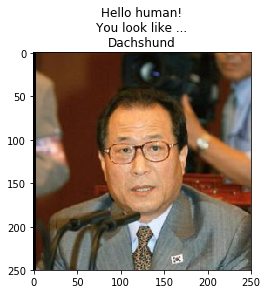

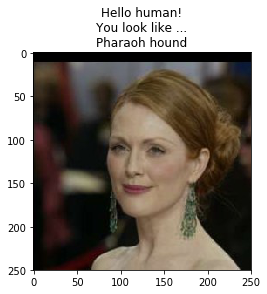

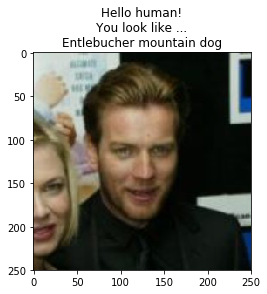

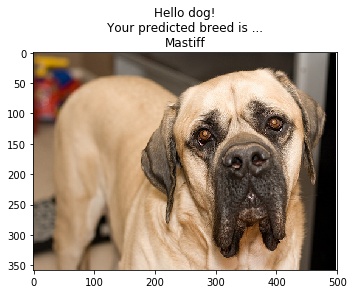

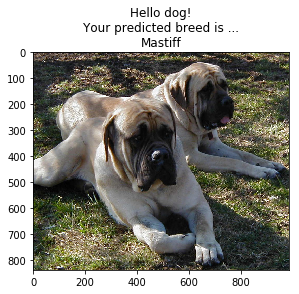

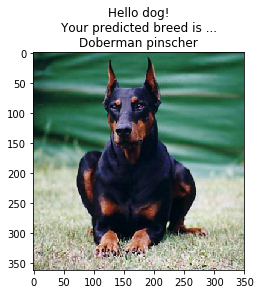

In [43]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

n = [5, 45, 99]

## suggested code, below
for file in np.hstack((human_files[n], dog_files[n])):
    run_app(file)